# Studying the Impact of Diabetes on the Human Body
&#x1F3E5;
---

## Exploratory Data Analysis

### Import Required Libraries

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings("ignore")

### Load the Data

In [134]:
clean_data = pd.read_csv('..\Data\cleaned_data.csv')

### Data Inspection & Univariate Analysis

In [135]:
# Creates a mapping to treat the diabetes variable as categorical
diabetes_cat_map = {1: 'Diabetic', 0: 'Non-Diabetic'}

Preliminary data inspection, univariate analysis, and correlation is available in the accompanying file [Data Cleaning & Report](Data%20Cleaning%20&%20Report.ipynb)


### Bivariate Analysis

##### Numerical Variables

**Diabetes & Age**

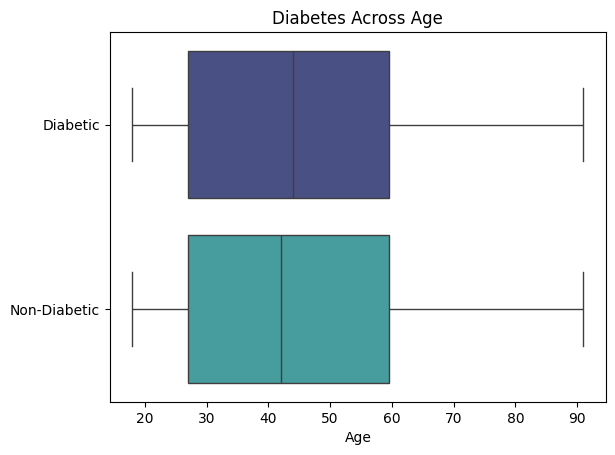

In [155]:
# Diabetes and age boxplot
plt.figure()
sns.boxplot(clean_data, x='age', y=clean_data['diabetes'].map(diabetes_cat_map), palette='mako')
plt.ylabel('')
plt.xlabel('Age')
plt.title('Diabetes Across Age')
plt.show()

The box plot for diabetes records across ages suggest there may exist a slight difference in the mean age of diabetic and non diabetic patients, which is worth exploring with a hypothesis test ([Hypothesis Testing](#hypothesis-testing)). A preliminary visual analysis would indicate diabetes is more prevalent in older patients. Nonetheless, the mean ages for diabetic and non-diabetic patients remain close between 40 and 45 years of age. It is also important to highlight that age records may be influenced by age of diagnosis and time past since diagnosis.

**Diabetes & BMI**

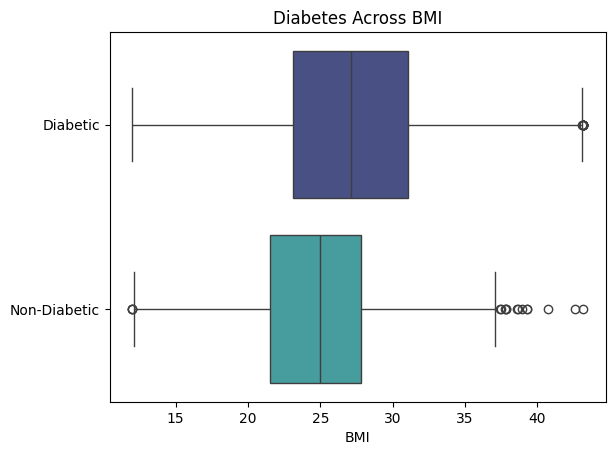

In [137]:
# Diabetes and BMI boxplot
plt.figure()
sns.boxplot(clean_data, x='BMI', y=clean_data['diabetes'].map(diabetes_cat_map), palette='mako')
plt.ylabel('')
plt.title('Diabetes Across BMI')
plt.show()

The box plot for diabetes acros BMI suggests a significant difference between diabetic and non-diabetic patients, which is worth exploring with a hypothesis test ([Hypothesis Testing](#hypothesis-testing)). The preliminary visual analysis indicates that non-diabetic patients are more likely to have a lower BMI than diabetic patients. Nontheless, it is worth highlighting that the non-diabetic patients have a wide range of BMI values with potential outliers in both the upper and lower bounds.

**Diabetes & Weight**

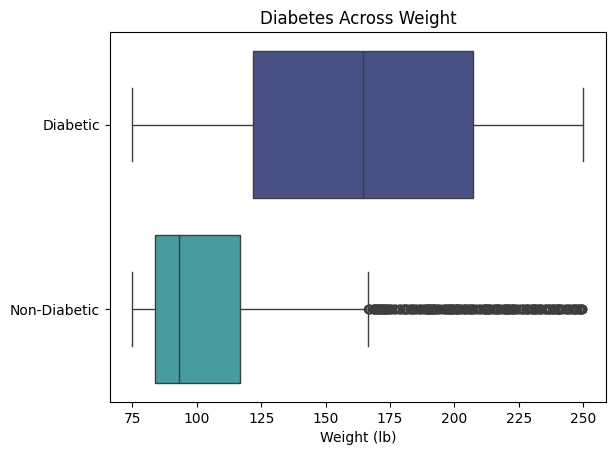

In [138]:
# Diabetes and Weight boxplot
plt.figure()
sns.boxplot(clean_data, x='weight', y=clean_data['diabetes'].map(diabetes_cat_map), palette='mako')
plt.ylabel('')
plt.xlabel('Weight (lb)')
plt.title('Diabetes Across Weight')
plt.show()

The boxplot for diabetes across weight suggest a significant difference in the mean weight between diabetic and non-diabetic patients which is worth exploring with a hypothesis test ([Hypothesis Testing](#hypothesis-testing)). The preliminary visual analysis suggest diabetic patients tend to have higher weight records than non-diabetic patients. On this point it is important to highlight that weight is strongly related to BMI ($BMI = weight / height^2$), and in a similar manner to the behaviour shown on the boxplot for BMI, there are important outliers (specifically on the upper bound).

**Diabetes & Sleep Duration**

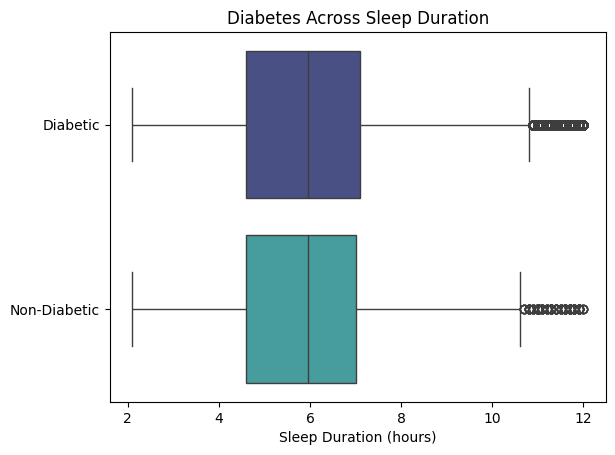

In [139]:
# Diabetes and Sleep Duration boxplot
plt.figure()
sns.boxplot(clean_data, x='sleep_duration', y=clean_data['diabetes'].map(diabetes_cat_map), palette='mako')
plt.ylabel('')
plt.xlabel('Sleep Duration (hours)')
plt.title('Diabetes Across Sleep Duration')
plt.show()

As a preliminary visual analysis, the boxplot suggests there is no significant difference in the mean hours of sleep of diabetic and non-diabetic patients.

**Diabetes & Pregnancies in Women**

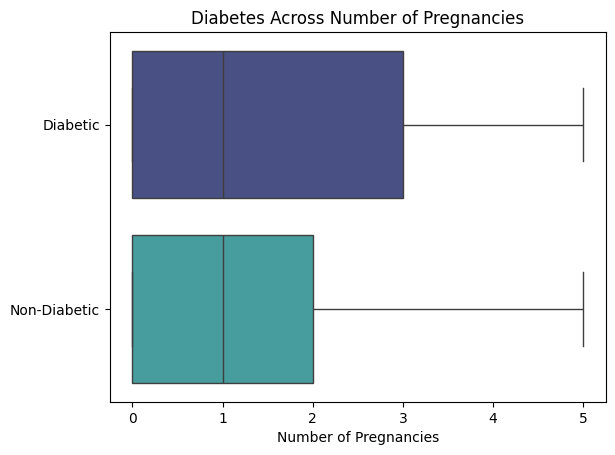

In [140]:
# Diabetes and Pregnancies (Women) boxplot
plt.figure()
sns.boxplot(clean_data[clean_data['gender'] == 'female'], x='pregnancies', y=clean_data['diabetes'].map(diabetes_cat_map), palette='mako')
plt.ylabel('')
plt.xlabel('Number of Pregnancies')
plt.title('Diabetes Across Number of Pregnancies')
plt.show()

As a preliminary visual analysis, the boxplot suggests there is no significant difference in the mean number of pregnancies of female diabetic and non-diabetic patients.

**Diabetes & Diabetes Pedigree Function**

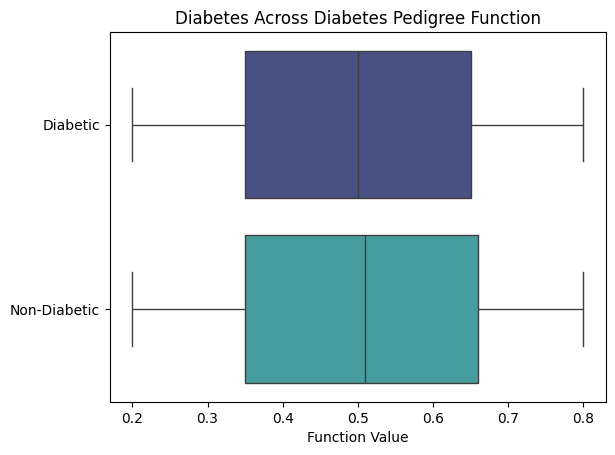

In [141]:
# Diabetes and diabetes pedigree function boxplot
plt.figure()
sns.boxplot(clean_data, x='diabetes_pedigree_function', y=clean_data['diabetes'].map(diabetes_cat_map), palette='mako')
plt.ylabel('')
plt.xlabel('Function Value')
plt.title('Diabetes Across Diabetes Pedigree Function')
plt.show()

As a preliminary visual analysis, the boxplot suggests there is no significant difference in the mean pedigree function of diabetic and non-diabetic patients.

##### Categorical Variables

In [142]:
# Create a function to generated a percentage staked bar graph for the analysis of cat variables

def stacked_viz(col, colors, title, legend, pos, order):

    """
    Creates a stacked bar chart showing the percentage of diabetes acros categories

    Parameters:
        col: categorical variable to review
        colors: number of palette colours required (equals the number of categories)
        title: title for the graph
        legend: title for the graph's legend
        pos: legend position

    Returns:
        tuple: A tuple containing:
            - fig: The figure object for the plot
            - ax: The axes object for the plot
    """

    grouped = clean_data.groupby(['diabetes', col]).size().reset_index(name='count')
    grouped[col] = pd.Categorical(grouped[col], categories=order, ordered=True)
    grouped['percent'] = grouped['count'] / grouped.groupby('diabetes')['count'].transform('sum') * 100
    grouped['diabetes_cat'] = grouped['diabetes'].map(diabetes_cat_map)
    pivot = grouped.pivot(index='diabetes_cat', columns=col, values='percent').fillna(0)

    # Stacked barplot
    fig, ax = plt.subplots()
    bars = pivot.plot(kind='barh', stacked=True, ax=ax, color=sns.color_palette("mako", n_colors=colors))

    for container in ax.containers:
        ax.bar_label(
            container,
            labels = [f'{v:.0f}%' if v > 0.16 else '' for v in container.datavalues], 
            label_type='center' 
        )

    plt.title(title)
    plt.ylabel('')
    plt.xlabel('Percentage (%)')
    plt.legend(title=legend, loc='upper right', bbox_to_anchor=pos)

    return fig, ax

**Diabetes & Gender**

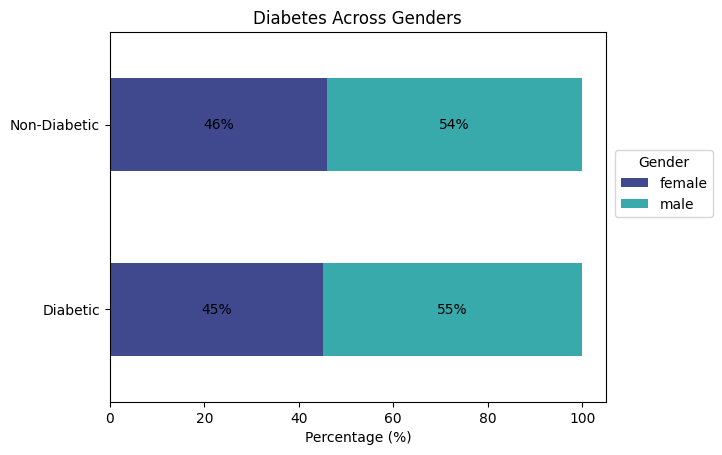

In [143]:
fig , ax = stacked_viz('gender', 2, 'Diabetes Across Genders', 'Gender',(1.23,0.7), ['female', 'male'])

As a preliminary visual analysis, the bar graph suggests there is no significant difference in the gender of diabetic and non-diabetic patients.

**Diabetes & hypertension**

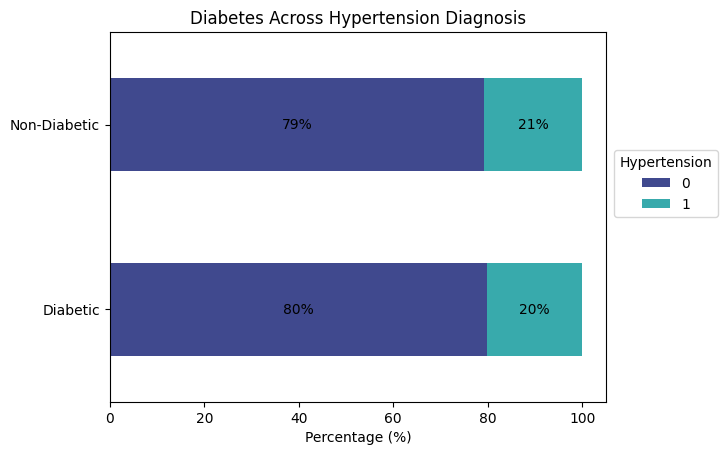

In [144]:
fig , ax = stacked_viz('hypertension', 2, 'Diabetes Across Hypertension Diagnosis', 'Hypertension', (1.24,0.7), [0, 1])

As a preliminary visual analysis, the bar graph suggests there is no significant difference in the hypertension diagnosis of diabetic and non-diabetic patients.

**Diabetes & Diet Type**

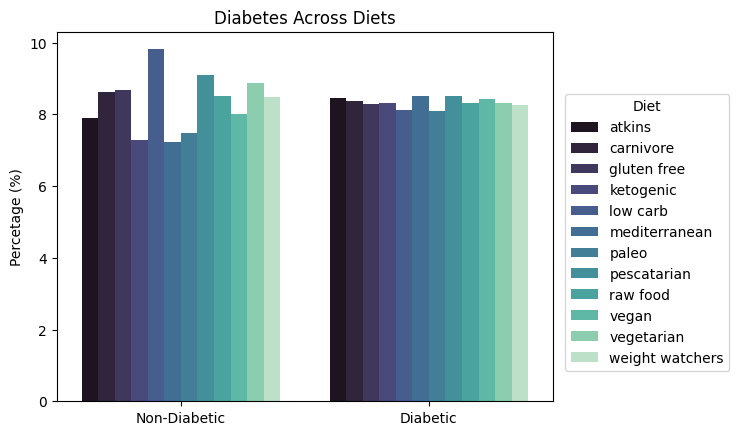

In [145]:
#sns.countplot(clean_data, x='diabetes', hue='diet_type', palette='mako')

grouped = clean_data.groupby(['diabetes', 'diet_type']).size().reset_index(name='count')
grouped['percent'] = grouped['count'] / grouped.groupby('diabetes')['count'].transform('sum') * 100
grouped['diabetes_cat'] = grouped['diabetes'].map(diabetes_cat_map)

sns.barplot(data=grouped, x='diabetes_cat', y='percent', hue='diet_type', palette='mako')
plt.title('Diabetes Across Diets')
plt.ylabel('Percetage (%)')
plt.xlabel('')
plt.legend(title='Diet', loc='upper right', bbox_to_anchor=(1.37, 0.85))

As a preliminary visual analysis the graph suggest there may exist differences between the diets of diabetic and non-diabetic patients. One the one hand non-diabetic patients tend to have low carb and low fat diets. On the other hand diabetic patients do not show a predominant diet or a discernible difference across diets. It is important to highlight that diet decisions can lead to given health conditions, however, being diagnosed certain health conditions may also lead to diet changes. Hence further analysis would benefit from a control for best results.

**Diabetes & Family Diabetes History**

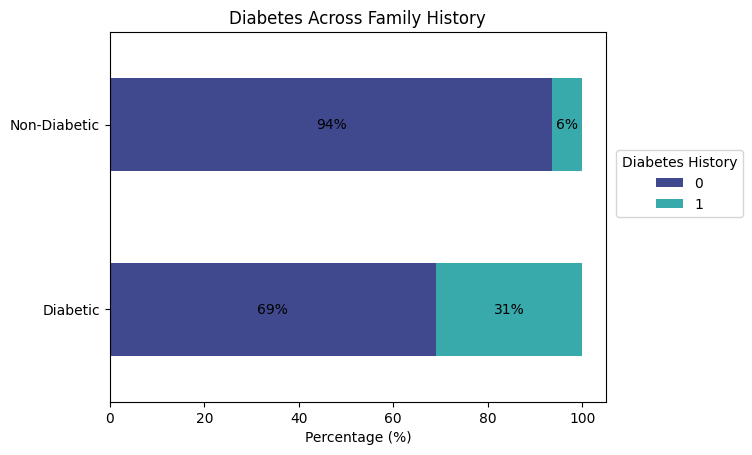

In [146]:
fig , ax = stacked_viz('family_diabetes_history', 2, 'Diabetes Across Family History', 'Diabetes History',(1.29,0.7), [0, 1])

A preliminary visual analysis suggests there is a significant difference in diabetes diagnosis for patients with and without a family history of diabetes. This indication is reasonable given certain cases of diabetes can be caused by both genetic and environmental factors. This relationship is further studied in ([Hypothesis Testing](#hypothesis-testing)).

**Diabetes & Physical Activity Level**

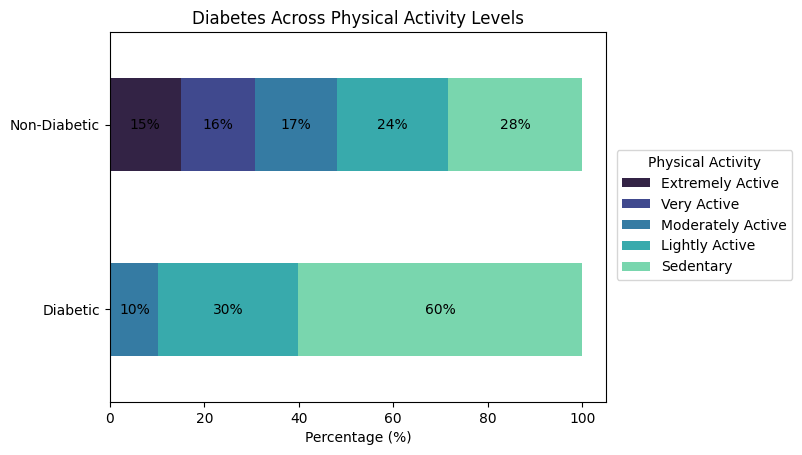

In [147]:
fig , ax = stacked_viz('physical_activity_level', 5, 'Diabetes Across Physical Activity Levels', 'Physical Activity', (1.39,0.7), ['Extremely Active', 'Very Active', 'Moderately Active',
                        'Lightly Active', 'Sedentary'])

The preliminary visual analysis suggests that diabetic patients are predominantly sedentary. While, non-diabetic patients have a wider range of physical activity, although the largest portion remains sedentary. Thus an interesting relationship to further study in ([Hypothesis Testing](#hypothesis-testing)).

**Diabetes & Stress Levels**

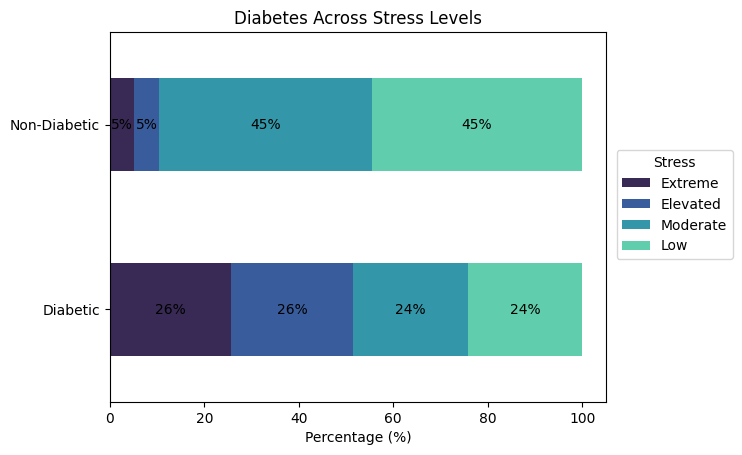

In [148]:
fig , ax = stacked_viz('stress_level', 4, 'Diabetes Across Stress Levels', 'Stress', (1.27,0.7), ['Extreme', 'Elevated', 'Moderate', 'Low'])

The preliminary visual analysis suggests diabetic patients are more likely to experience extreme and elevated stress levels than non-diabetic patients. Though it is important to highlight that both stress can have an effect on health and health can have an effect on stress (e.g. following a diabetes diagnosis, experiencing diabetes symptoms).

**Diabetes & Alcohol Consumption**

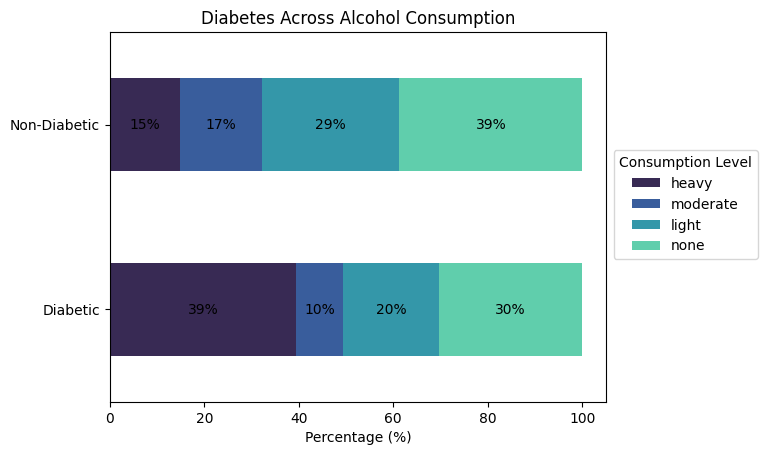

In [149]:
fig , ax = stacked_viz('alcohol_consumption', 4, 'Diabetes Across Alcohol Consumption', 'Consumption Level', (1.32,0.7), ['heavy', 'moderate', 'light', 'none'])

The preliminary visual analysis suggests diabetic patients are more likely to consume alcohol heavily. This relationship is worth studying further in the context of medicine, given alcohol can interfere with the effects of some diabetes medicines, while increasing the risk of Type 2 diabetes.

### Multivariate Analysis

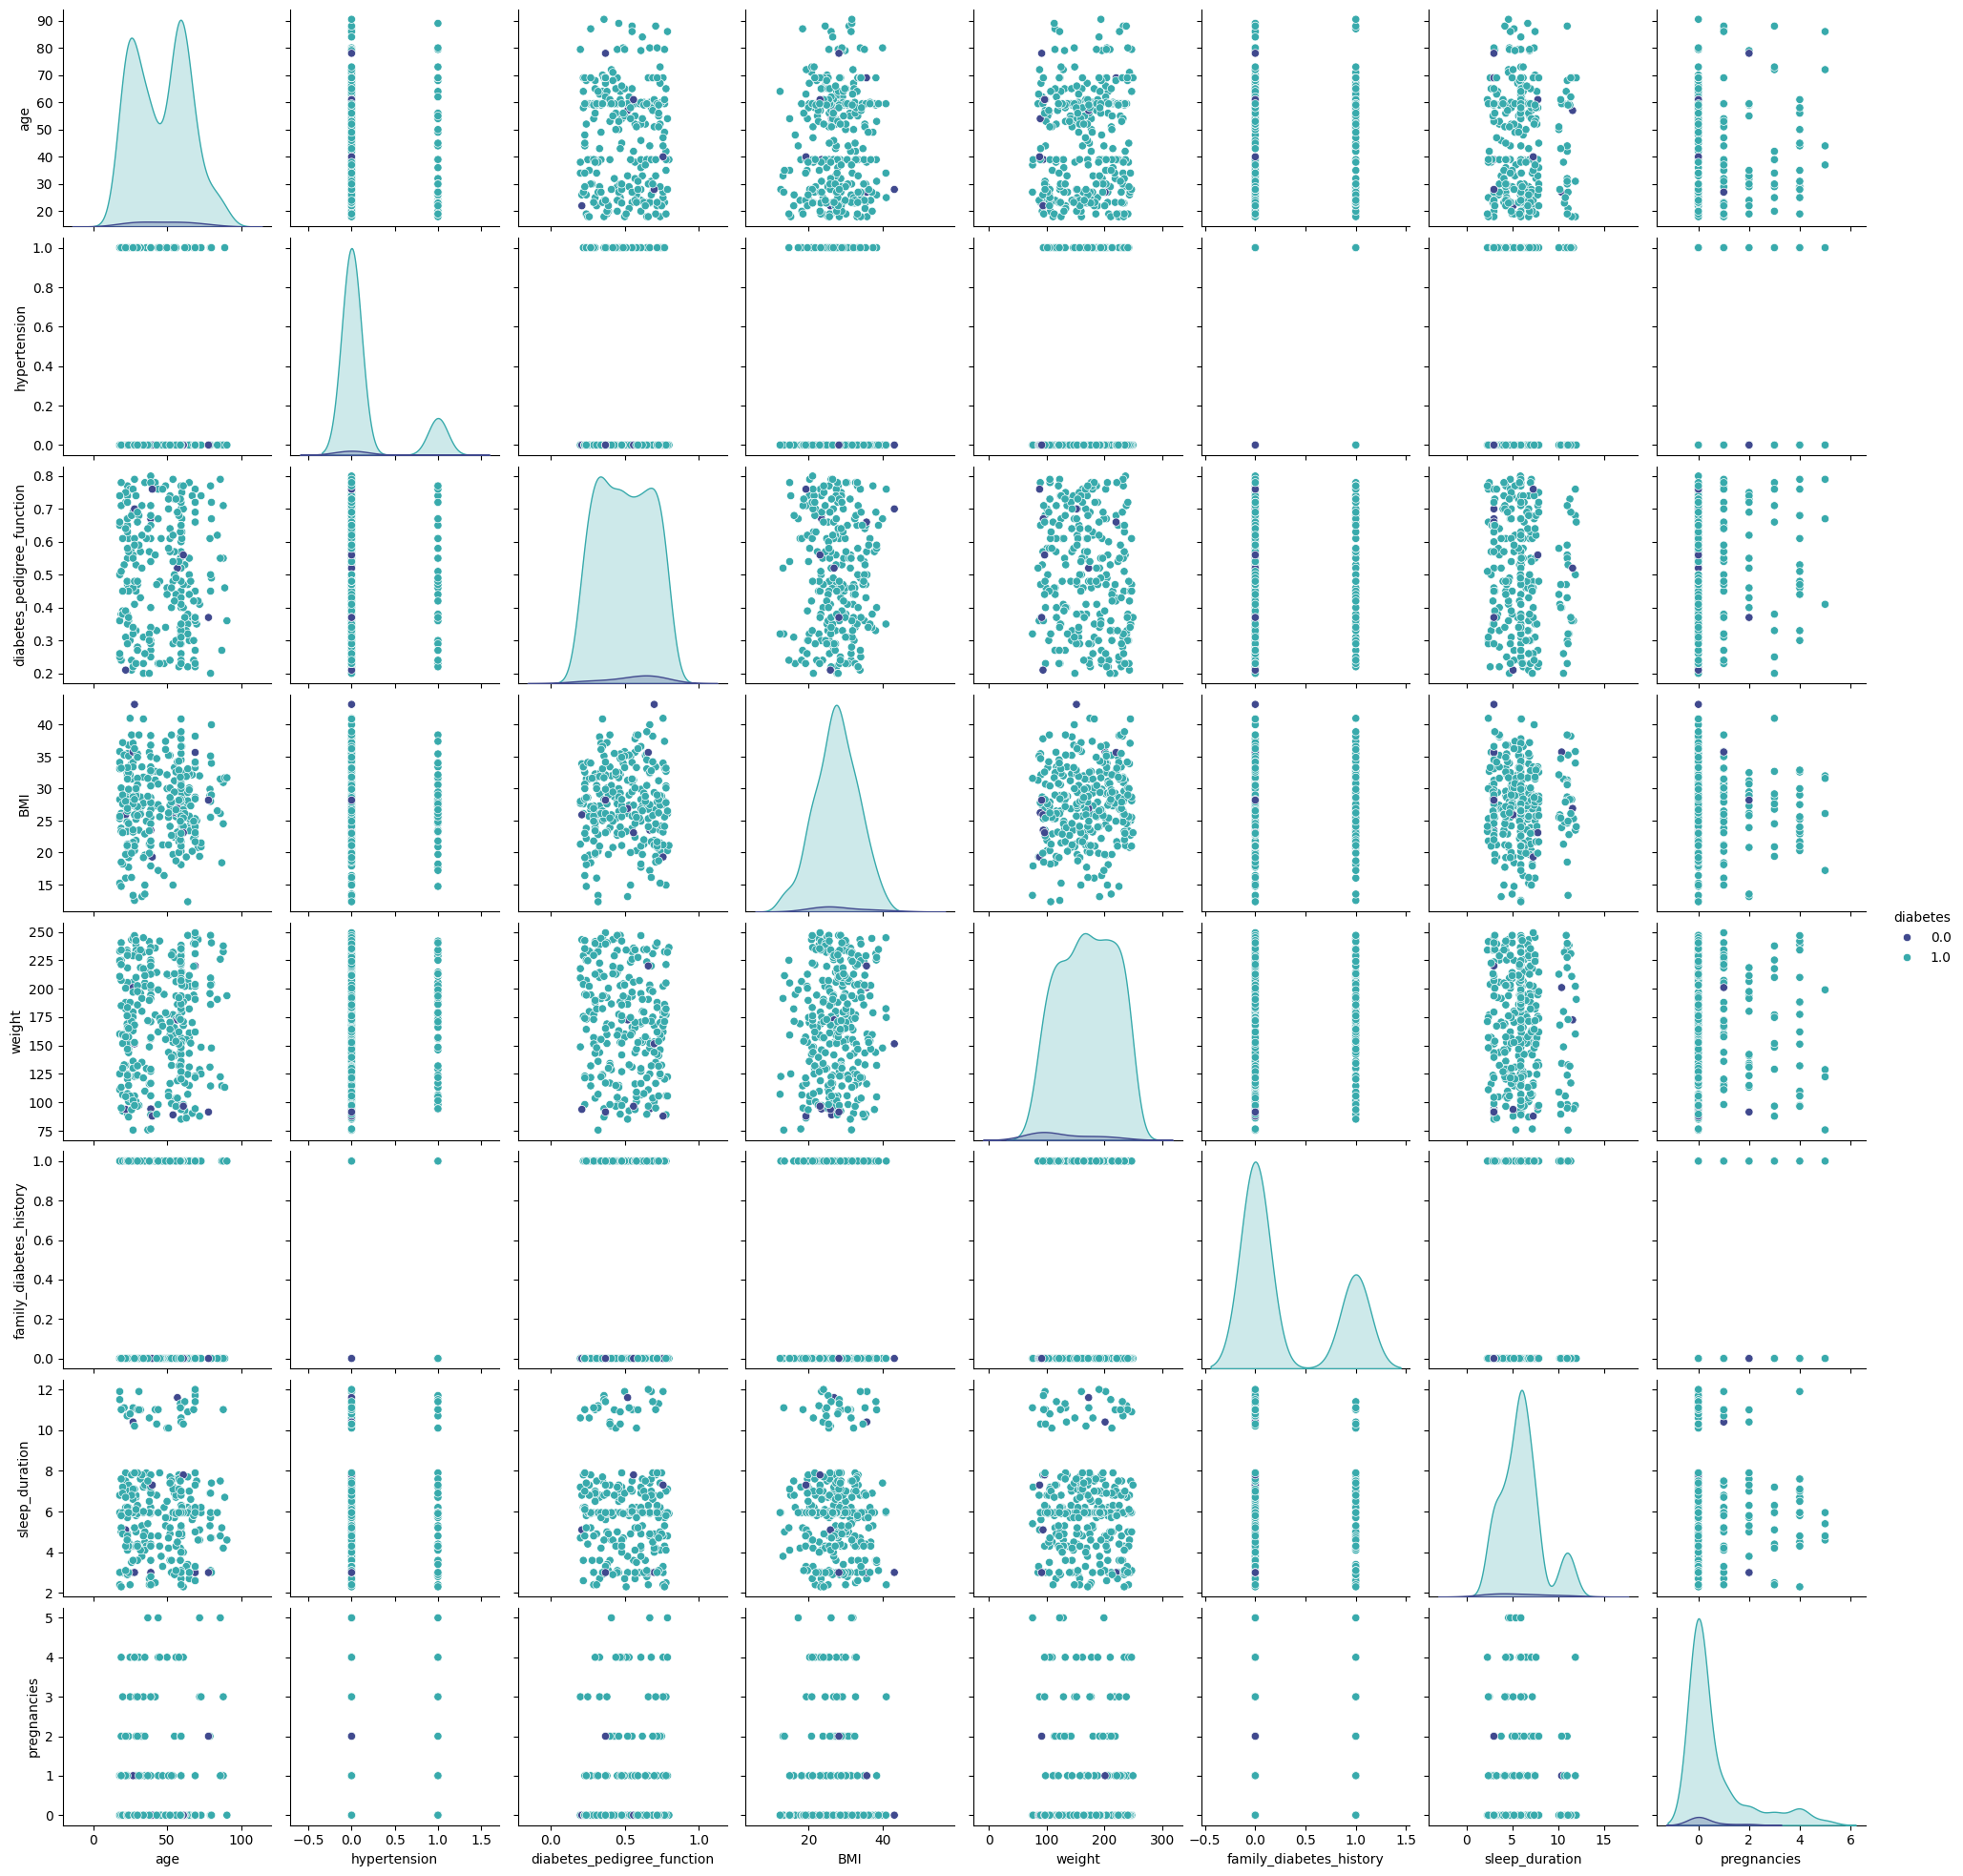

In [150]:
clean_data_sample, _ = train_test_split(clean_data, test_size=0.995, stratify=clean_data['diabetes'], random_state=42)
sns.pairplot(clean_data_sample, hue='diabetes', diag_kind='kde', palette='mako')

The multivariate analysis, even when performed on a representative small sample of the data, does not reveal new information about the dataset and the interaction between variables.

### Hypothesis Testing

#### Numerical Variables

In [151]:
# Define a function to run t-tests for different numerical variables

def t_test (num_col, pregnancies=False):
    """
    Performs a t-test for diabetes and a given numerical variable

    Args:
        num_col: numerical column to be testes
        pregnancies: boolean which determines if the data should be filtered for woman's records in the case of pregnancies analysis
    
    Returns:
        print_statement: print statement with the corresponding t-stat and p-value
    """
    num_col = num_col
    cat_col = 'diabetes'

    # T-Test for two categories
    if pregnancies == False:
        group1 = clean_data[(clean_data[cat_col] == 0) & (clean_data[num_col].notnull())][num_col]
        group2 = clean_data[(clean_data[cat_col] == 1) & (clean_data[num_col].notnull())][num_col]
        t_stat, p_value = ttest_ind(group1, group2)

    else:
        group1 = clean_data[(clean_data[cat_col] == 0) & (clean_data[filter_col] == filter_value) & (clean_data[num_col].notnull())][num_col]
        group2 = clean_data[(clean_data[cat_col] == 1) & (clean_data[filter_col] == filter_value) & (clean_data[num_col].notnull())][num_col]
        t_stat, p_value = ttest_ind(group1, group2)

    return t_stat, p_value

In [152]:
# Run t-test for all cnumerical variables and diabetes

num_variables = ['age', 'BMI', 'weight', 'sleep_duration', 'pregnancies', 'diabetes_pedigree_function']
t_stats = [int(t_test(num, True)[0]) if num == 'pregnancies' else int(t_test(num)[0]) for num in num_variables]
p_value_t = [float(round(t_test(num, True)[1],4)) if num == 'pregnancies' else float(round(t_test(num)[1],4)) for num in num_variables]

results = {
    'Numerical Variable': ['Age', 'BMI', 'Weight', 'Sleep Duration', 'Pregnancies', 'Diabetes Pedigree Function'],
    "T-test Statistic": t_stats,
    "P-Value": p_value_t,
}

results_t = pd.DataFrame(results)
results_t


,Numerical Variable,T-test Statistic,P-Value
0,Age,-1,0.2572
1,BMI,-19,0.0000
2,Weight,-45,0.0000
3,Sleep Duration,0,0.6082
4,Pregnancies,-1,0.2430
5,Diabetes Pedigree Function,0,0.5109


*T-Test*

T-test are performed to study the mean of numerical variables (e.g. mean Age) in diabetic and non-diabetic patients.

Null Hypothesis: the means of the two groups are equal (diabetic and non-diabetic patients)

Alternative Hypothesis: the means of the two groups are not equal (diabetic and non-diabetic patients)

$H_0: \mu_D = \mu_N$

$H_1: \mu_D \neq \mu_N$



The statistical analysis for the mean of numerical variables acros diabetes diagnoses reveals, that with a 1% significance level, there exsits enough statistical evidence to reject the null hypothesis in the case of BMI and weight. This conclusion supports the intial evidence gathered in the visual bivariate analysis. In addition, it is a reasonable indication in the context of diabetes, where accumulation of an excessive ammount of body fat can lead the the diagnosis of Type 2 diabetes.

#### Categorical Variables

In [153]:
# Define a function to run chi-square tests for different categorical variables

def chi_sq_test (cat_col):
    """
    Performs a chi-square test for diabetes and a given categorical variable

    Args:
        cat_col: numerical column to be testes
    
    Returns:
        print_statement: print statement with the corresponding chi square stat and p-value
    """
    cat_col1 = cat_col
    cat_col2 = 'diabetes'

    # Chi Square test
    contingency_table = pd.crosstab(clean_data[cat_col1], clean_data[cat_col2])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)

    return chi2, p_value

In [154]:
# Run chi-square tests for all categorical variables and diabetes

cat_variables = ['gender', 'hypertension', 'diet_type', 'family_diabetes_history', 'physical_activity_level', 'stress_level', 'alcohol_consumption']
chi_2 = [int(chi_sq_test(cat)[0]) for cat in cat_variables]
p_value_c = [float(round(chi_sq_test(cat)[1],4)) for cat in cat_variables]

results = {
    'Categorical Variable': ['Gender', 'Hypertension', 'Diet Type', 'Family History', 'Physical Activity', 'Stress Level', 'Alcohol Consumption'],
    "Chi-Square Statistic": chi_2,
    "P-Value": p_value_c,
}

results_c = pd.DataFrame(results)
results_c

,Categorical Variable,Chi-Square Statistic,P-Value
0,Gender,0,0.4748
1,Hypertension,0,0.4703
2,Diet Type,16,0.1149
3,Family History,540,0.0000
4,Physical Activity,15277,0.0000
5,Stress Level,1258,0.0000
6,Alcohol Consumption,511,0.0000


*Chi-Square Test*

Chi-Square tests are performed to study the association between diabetes and categorical variables as Physical Activity.

Null Hypothesis: there exists no association between diabetes and the corresponding categorical variable

Alternative Hypothesis: there exists an association between diabetes and the corresponding categorical variable

The statistical analysis for the association of diabetes with each of the categorical variables in the dataset reveals, that with a 1% significance level, there exists enough evidence to reject the null hypothesis in the case of family history of diabetes, physical activity, stress level, and alcohol consumption. This conclusion supports the initial evidence gathered in the visual bivariate analysis. In addition, it is a reasonable indication in the context of diabetes:

- Family history: Type 2 diabetes can be caused by genetic factors
- Physical activity: regular excercise can result in sustained improvements in insulin sensitivity and glucose disposal
- Stress level: According to the National Library of Medicine, stress has a significant impact on metabolic function; Type 2 diabetes may be initiated by psychological and physical stress
- Alcohol Consumption: alcohol can increase the risk of developing Type 2 diabetes, and also interfere with the effect of certain diabetes medicines. Therefore, further study is needed into the elevated alcohol consumption levels registered for diabetic patients.

### Final Remarks

Through the process of inspecting, cleaning and analysing the data, it was possible to gain important insights on the behaviour of diabetes across an array of relevant factors; of particular importance:

- BMI
- Weight
- Family history of diabetes
- Physical activity
- Stress levels
- Alcohol consumption

Nevertheless, it is important to highligh key factors which influence the data processing and results contained in the analysis:

- The dataset contains a low percentage of records for non-diabetic patients, which can limit the robustness of comparative analyses
- The dataset does not distinguish between Type 1 and Type 2 diabetes which have different characteristics, causes, and treatments
- Expert input from the field of medicine is required to further review, validate, and interpret the results presented
 